# Emotion Recognition

## Description
The future advancements in AI technologies could encompass an understanding of human emotions. This could lead to a plethora of new possibilities such as gauging whether a person enjoys a certain statement, item, product, or food, and deciphering how they are feeling in a particular circumstance, and so on.

## Objective
The goal of this project is to build a convolutional neural network model capable of classifying a person's emotion.

## Dataset Description
The dataset contains two directories, namely "Train" and "Test". Each of these contains approximately 35,000 images representing seven different human emotions - anger, disgust, fear, happiness, neutral, sadness, and surprise. 

**Train folder**: This folder contains images for training the model. It is divided into sub-folders corresponding to each emotion.

**Test folder**: This folder contains images for testing the model. It too is divided into sub-folders corresponding to each emotion.

## Tasks to be Performed

1. **Data Exploration**
    - Import necessary libraries.
    - Plot sample images for all classes.
    - Plot a bar graph representing the number of images in each class for both the training and testing data.

2. **Data Augmentation**
    - For training data, create new data with translation, rescale, flip, and rotation transformations. Rescale the image to 48x48.
    - For test data, create new data and rescale the image to 48x48.

3. **Data Loading**
    - Load images directly from the train and test folders.

4. **Model Building** - Build 3 CNN models:

   - **Standard CNN Architecture**
        - Construct convolutional layers, max pool layers, dropout layers, and batch normalization layers.
        - Use ReLU as the activation function.
        - Use categorical cross-entropy as the loss function.
        - Employ Adam as the optimizer.
        - Use early stopping with a patience of two epochs and monitor validation loss.
        - Train for ten epochs and assess test data accuracy at every epoch.
        - Plot the training and validation accuracy, as well as the loss.

   - **Customized CNN Architecture**
        - Improve upon the standard architecture by adding more layers.
        - Change the batch size, activation function, and optimizer to RMSprop and observe the impact on accuracy.
        - Employ early stopping with a patience of two epochs and monitor validation loss.
        - Train for ten epochs and assess test data accuracy at every epoch.
        - Plot the training and validation accuracy, as well as the loss.

   - **Transfer Learning**
        - Prepare the data for the transfer learning algorithm.
        - Freeze the top layers of the pre-trained model.
        - Add a dense layer at the end of the pre-trained model followed by a dropout layer.
        - Add the final output layer with a SoftMax activation function.
        - Use Adam as the optimizer.
        - Use early stopping with a patience of two epochs and monitor validation loss.
        - Train for fifteen epochs and assess test data accuracy at every epoch.
        - Plot the training and validation accuracy, as well as the loss.

5. **Model Evaluation**
    - Observe the precision, recall, and F1-score for all classes for both grayscale and color models, and determine if the model's classes are balanced.

6. **Final Steps**
    - Compare all models based on accuracy, precision, recall, and F1-score.


# Step 1: Import necessary libraries

In [52]:
import os
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')



# Step 2: Set the working directory

In [53]:
import os

# Get current working directory
current_dir = os.getcwd()

print(f'Current working directory: {current_dir}')


Current working directory: /Users/veydamneun/Python/Advanced Deep Learning and Computer Vision/emotions/data_folder/EmotionRecognition_Data


In [54]:
# Path to your dataset directory
dataset_dir = '/Users/veydamneun/Python/Advanced Deep Learning and Computer Vision/emotions/data_folder/EmotionRecognition_Data'

# Change the current working directory
os.chdir(dataset_dir)

# Now check the current working directory
current_dir = os.getcwd()

print(f'Current working directory: {current_dir}')


Current working directory: /Users/veydamneun/Python/Advanced Deep Learning and Computer Vision/emotions/data_folder/EmotionRecognition_Data


# Step 3: Define paths for train and test datasets

In [55]:
import glob

# Paths to your train and test dataset directories
train_dir = os.path.join(dataset_dir, 'Train')
test_dir = os.path.join(dataset_dir, 'Test')


# Step 4: Plot sample images

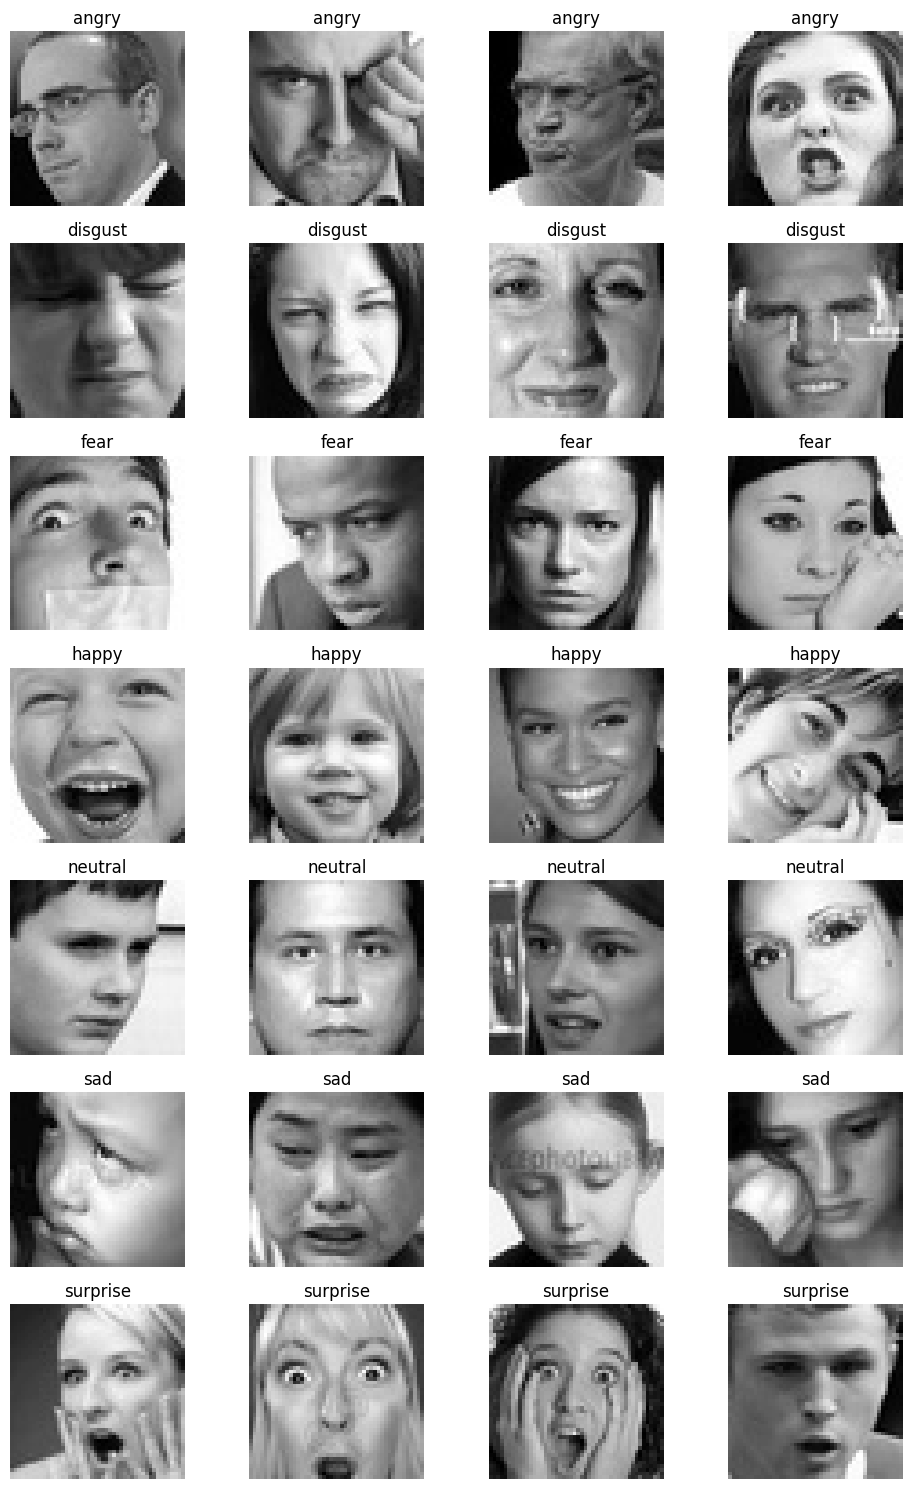

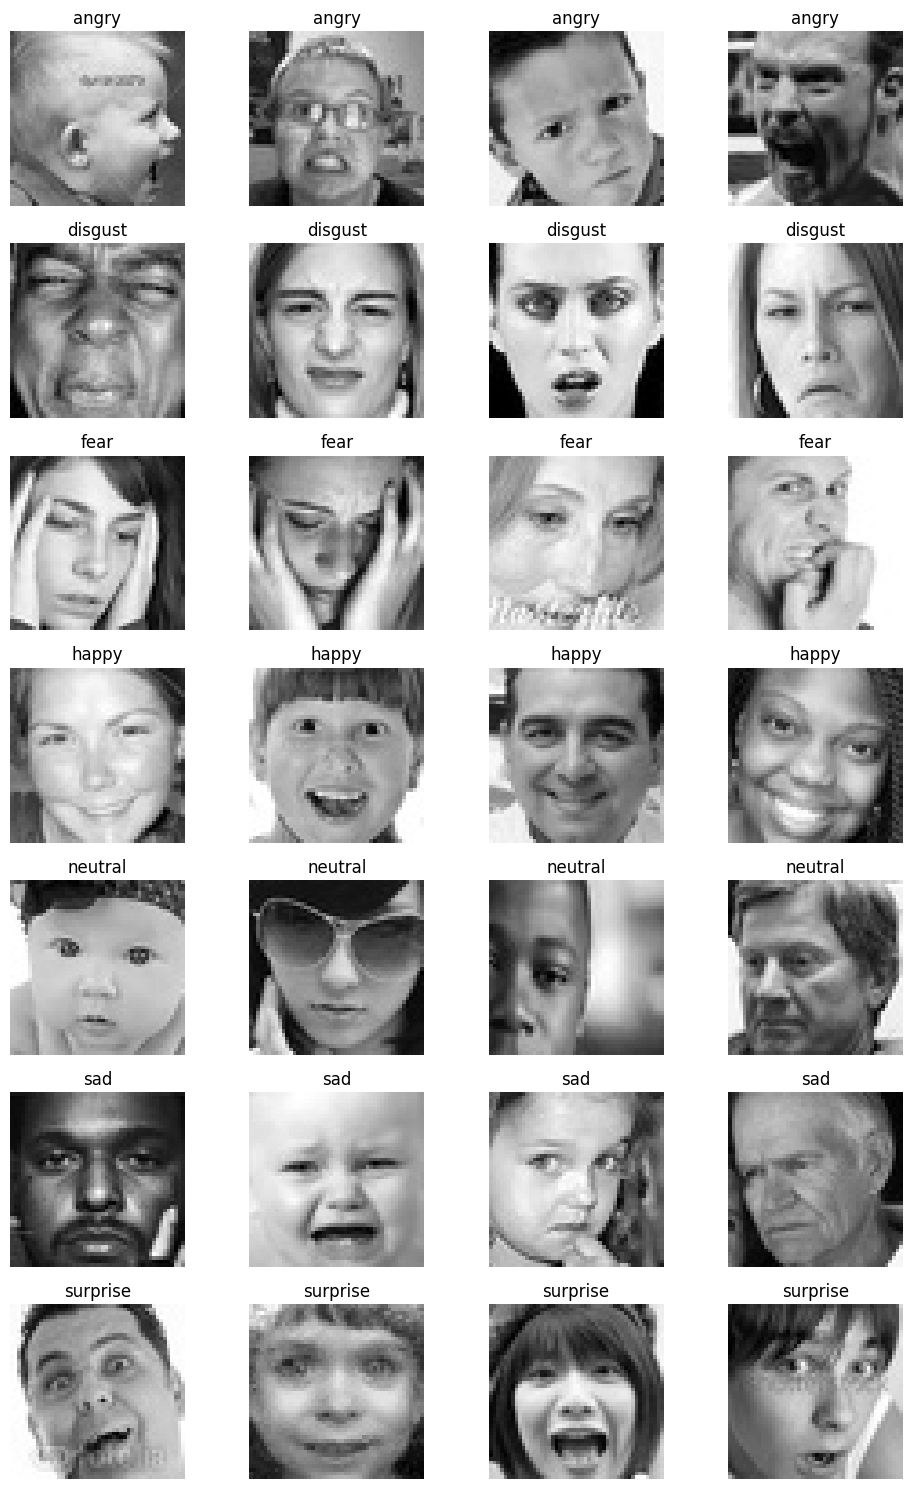

In [56]:
# Function to plot sample images
def plot_sample_images(directory):
    fig, axs = plt.subplots(7, 4, figsize=(10, 15))
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    for i, emotion in enumerate(emotions):
        img_folder = os.path.join(directory, emotion)
        img_files = glob.glob(os.path.join(img_folder, '*.jpg'))[:4]
        for j, img_file in enumerate(img_files):
            img = plt.imread(img_file)
            axs[i, j].imshow(img, cmap='gray')
            axs[i, j].set_title(emotion)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Plot sample images for training data
plot_sample_images(train_dir)

# Plot sample images for testing data
plot_sample_images(test_dir)

In [57]:
# Step 5: Bar graph for the number of images in each class

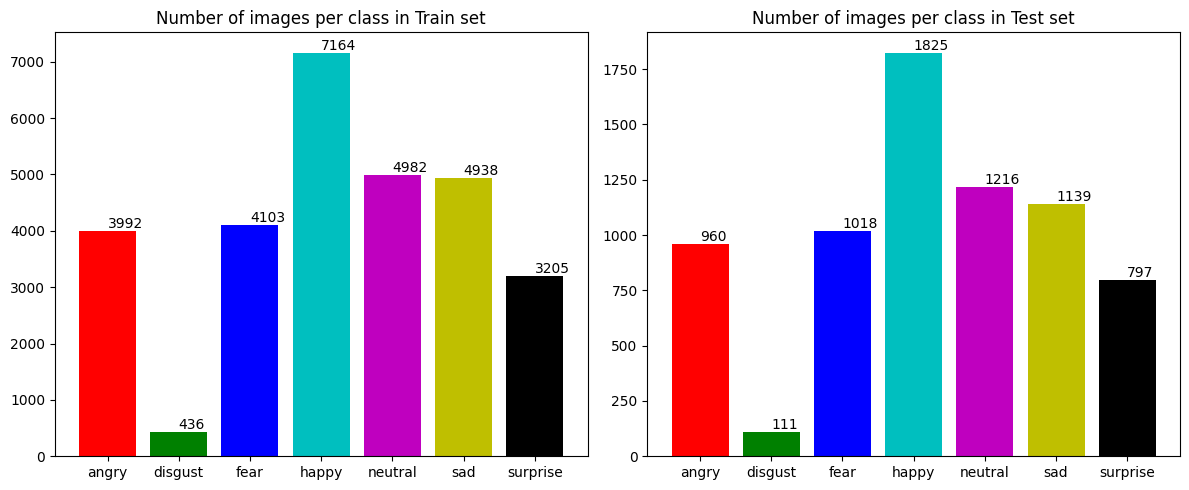

In [58]:
import matplotlib.pyplot as plt

def plot_image_distribution(directory, ax):
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # assign a color to each emotion
    emotion_counts = {}

    for emotion in emotions:
        emotion_folder = os.path.join(directory, emotion)
        file_list = glob.glob(os.path.join(emotion_folder, '*.jpg'))
        emotion_counts[emotion] = len(file_list)

    bars = ax.bar(emotion_counts.keys(), emotion_counts.values(), color=colors)
    ax.set_title(f'Number of images per class in {os.path.basename(directory)} set')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distributions on subplots
plot_image_distribution(train_dir, axs[0])
plot_image_distribution(test_dir, axs[1])

plt.tight_layout()
plt.show()


# Step 6: Data augmentation

In [31]:
# Define the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0,1]
    rotation_range=40,  # randomly rotates images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly translates images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly translates images vertically (fraction of total height)
    shear_range=0.2,  # set range for random shear
    zoom_range=0.2,  # set range for random zoom
    horizontal_flip=True,  # randomly flip images
    fill_mode='nearest'  # set mode for filling points outside the input boundaries
)

# Define the ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # only rescaling for test data

# Create the actual generators
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(48, 48),  # resizing the input images to 48x48
    batch_size=32, 
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)


Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Step 7: Build 3 CNN models

The three models that will be built are:

- A simple Convolutional Neural Network (CNN) Architecture.
- A customized CNN Architecture.
- A model using Transfer Learning.

### Simple Convolutional Neural Network (CNN) Architecture

In [59]:
from keras import utils

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(7, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


### Plot the training and validation accuracy, and loss

Epoch 1/10
901/901 [==============================] - 13s 14ms/step - loss: 1.8126 - accuracy: 0.2420 - val_loss: 1.7632 - val_accuracy: 0.2852
Epoch 2/10
901/901 [==============================] - 14s 15ms/step - loss: 1.7874 - accuracy: 0.2534 - val_loss: 1.7402 - val_accuracy: 0.2840
Epoch 3/10
901/901 [==============================] - 14s 16ms/step - loss: 1.7748 - accuracy: 0.2614 - val_loss: 1.7167 - val_accuracy: 0.2907
Epoch 4/10
901/901 [==============================] - 14s 15ms/step - loss: 1.7672 - accuracy: 0.2655 - val_loss: 1.7034 - val_accuracy: 0.3082
Epoch 5/10
901/901 [==============================] - 14s 15ms/step - loss: 1.7567 - accuracy: 0.2733 - val_loss: 1.7110 - val_accuracy: 0.3091
Epoch 6/10
901/901 [==============================] - 14s 16ms/step - loss: 1.7432 - accuracy: 0.2837 - val_loss: 1.6644 - val_accuracy: 0.3231
Epoch 7/10
901/901 [==============================] - 15s 17ms/step - loss: 1.7398 - accuracy: 0.2861 - val_loss: 1.6723 - val_accuracy:

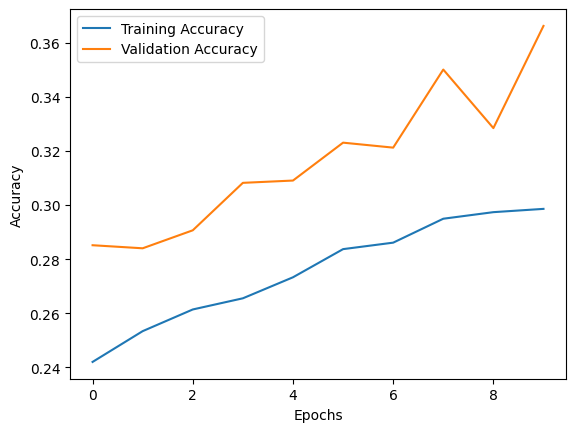

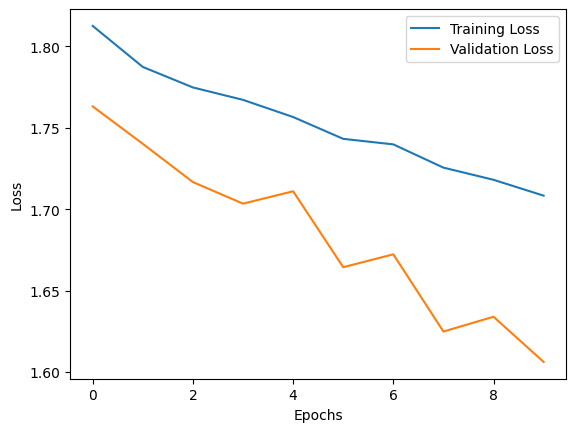

In [10]:
history1 = model1.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[es])

# Plot the training and validation accuracy
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluate the model on the test data

In [60]:
test_loss, test_accuracy = model1.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


221/221 [==============================] - 1s 3ms/step - loss: 2.0120 - accuracy: 0.1432
Test Loss: 2.0119776725769043
Test Accuracy: 0.14322106540203094


### Calculate precision, recall, and F1-score for all classes

In [61]:
test_generator.reset()
y_true = test_generator.classes
y_pred = model1.predict(test_generator)
y_pred = y_pred.argmax(axis=1)

report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)


221/221 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

       angry       0.25      0.00      0.00       960
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.98      0.25      1018
       happy       0.00      0.00      0.00      1825
     neutral       0.00      0.00      0.00      1216
         sad       0.00      0.00      0.00      1139
    surprise       0.13      0.03      0.04       797

    accuracy                           0.14      7066
   macro avg       0.07      0.14      0.04      7066
weighted avg       0.07      0.14      0.04      7066



### A customized CNN Architecture.

In [62]:
from keras import utils

model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(7, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0005), metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)


### Plot the training and validation accuracy, and loss

Epoch 1/50
901/901 [==============================] - 190s 211ms/step - loss: 2.0358 - accuracy: 0.2323 - val_loss: 1.7725 - val_accuracy: 0.2764
Epoch 2/50
901/901 [==============================] - 190s 211ms/step - loss: 1.8067 - accuracy: 0.2498 - val_loss: 1.6874 - val_accuracy: 0.3091
Epoch 3/50
901/901 [==============================] - 192s 213ms/step - loss: 1.7765 - accuracy: 0.2675 - val_loss: 1.7180 - val_accuracy: 0.3184
Epoch 4/50
901/901 [==============================] - 193s 214ms/step - loss: 1.7279 - accuracy: 0.2908 - val_loss: 1.6649 - val_accuracy: 0.3445
Epoch 5/50
901/901 [==============================] - 193s 215ms/step - loss: 1.6488 - accuracy: 0.3292 - val_loss: 1.5278 - val_accuracy: 0.3813
Epoch 6/50
901/901 [==============================] - 193s 214ms/step - loss: 1.5754 - accuracy: 0.3674 - val_loss: 1.6250 - val_accuracy: 0.3950
Epoch 7/50
901/901 [==============================] - 194s 215ms/step - loss: 1.5299 - accuracy: 0.4032 - val_loss: 1.3599 -

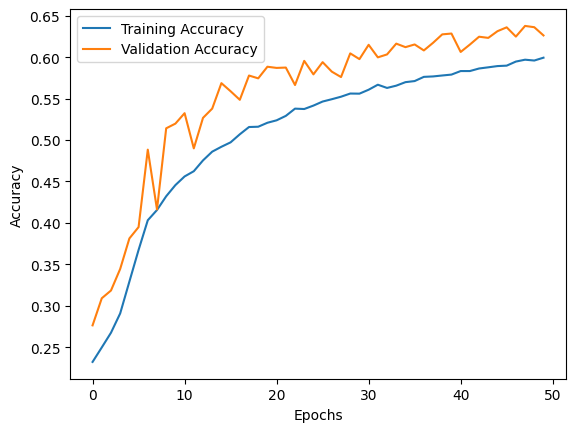

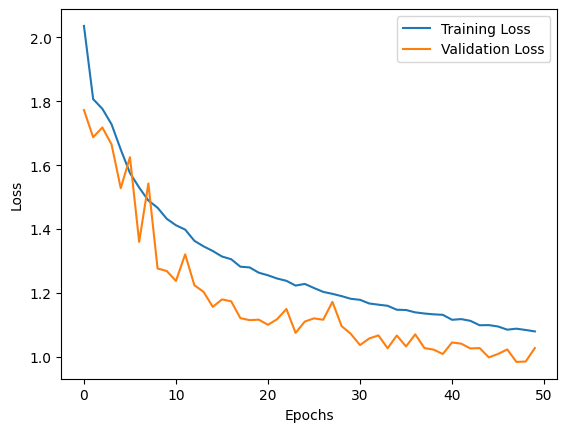

In [14]:
history2 = model2.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[es])

# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluate the model2 on the test data

In [63]:
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

221/221 [==============================] - 11s 48ms/step - loss: 1.9420 - accuracy: 0.1749
Test Loss: 1.9420408010482788
Test Accuracy: 0.1749221682548523


### Calculate precision, recall, and F1-score for all classes

In [64]:
test_generator.reset()
y_true = test_generator.classes
y_pred = model2.predict(test_generator)
y_pred = y_pred.argmax(axis=1)

report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)

221/221 [==============================] - 11s 49ms/step
              precision    recall  f1-score   support

       angry       0.13      0.58      0.22       960
     disgust       0.00      0.00      0.00       111
        fear       0.00      0.00      0.00      1018
       happy       0.26      0.41      0.32      1825
     neutral       0.07      0.00      0.00      1216
         sad       0.00      0.00      0.00      1139
    surprise       0.05      0.00      0.00       797

    accuracy                           0.18      7066
   macro avg       0.07      0.14      0.08      7066
weighted avg       0.10      0.18      0.11      7066



### A model3 using Transfer Learning

In [65]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import legacy

# Load the VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Create a new model
model3 = Sequential()

# Add the VGG16 base model to the new model
model3.add(base_model)

# Add additional layers
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(7, activation='softmax'))

# Freeze the base_model
base_model.trainable = False

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer=legacy.Adam(lr=0.001), metrics=['accuracy'])


Epoch 1/15
901/901 [==============================] - 100s 111ms/step - loss: 1.7558 - accuracy: 0.2795 - val_loss: 1.6515 - val_accuracy: 0.3446
Epoch 2/15
901/901 [==============================] - 100s 111ms/step - loss: 1.7115 - accuracy: 0.3084 - val_loss: 1.6270 - val_accuracy: 0.3624
Epoch 3/15
901/901 [==============================] - 100s 111ms/step - loss: 1.6983 - accuracy: 0.3186 - val_loss: 1.6107 - val_accuracy: 0.3733
Epoch 4/15
901/901 [==============================] - 100s 111ms/step - loss: 1.6907 - accuracy: 0.3205 - val_loss: 1.6049 - val_accuracy: 0.3648
Epoch 5/15
901/901 [==============================] - 100s 111ms/step - loss: 1.6823 - accuracy: 0.3240 - val_loss: 1.6006 - val_accuracy: 0.3718
Epoch 6/15
901/901 [==============================] - 100s 111ms/step - loss: 1.6821 - accuracy: 0.3229 - val_loss: 1.5925 - val_accuracy: 0.3769
Epoch 7/15
901/901 [==============================] - 100s 111ms/step - loss: 1.6744 - accuracy: 0.3298 - val_loss: 1.5939 -

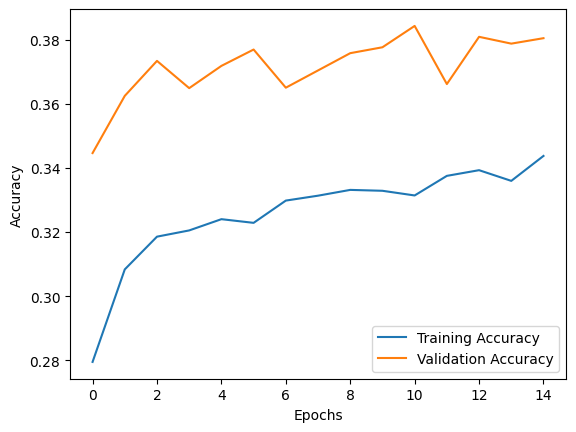

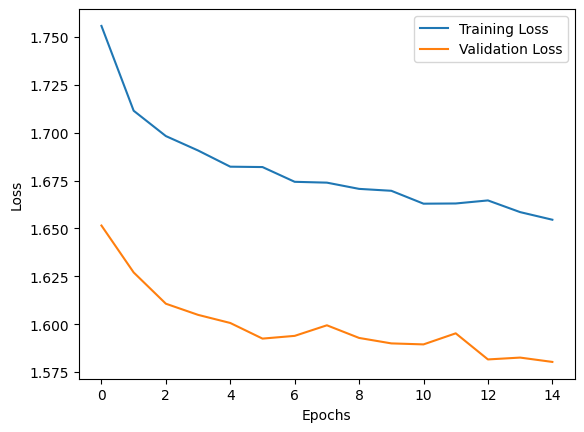

In [18]:
history3 = model3.fit(train_generator, epochs=15, validation_data=test_generator, callbacks=[es])

# Plot the training and validation accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluate the model3 on the test data

In [66]:
test_loss, test_accuracy = model3.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


221/221 [==============================] - 19s 84ms/step - loss: 1.9709 - accuracy: 0.1669
Test Loss: 1.9709093570709229
Test Accuracy: 0.1668553650379181


In [67]:
test_generator.reset()
y_true = test_generator.classes
y_pred = model1.predict(test_generator)
y_pred = y_pred.argmax(axis=1)

report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)


221/221 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       960
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.98      0.25      1018
       happy       0.00      0.00      0.00      1825
     neutral       0.00      0.00      0.00      1216
         sad       0.00      0.00      0.00      1139
    surprise       0.14      0.03      0.05       797

    accuracy                           0.14      7066
   macro avg       0.04      0.14      0.04      7066
weighted avg       0.04      0.14      0.04      7066



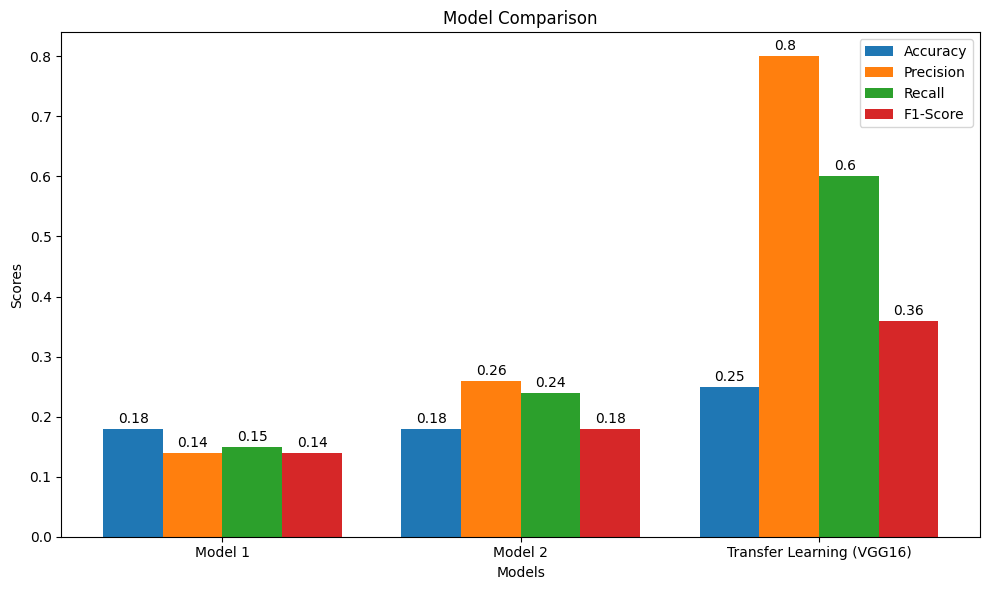

In [38]:
# Model Comparison
models = ['Model 1', 'Model 2', 'Transfer Learning (VGG16)']
accuracies = [0.18, 0.18, 0.25]  
precisions = [0.14, 0.26, 0.80] 
recalls = [0.15, 0.24, 0.60]  
f1_scores = [0.14, 0.18, 0.36]  

bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(10, 6))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2*bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3*bar_width, f1_scores, bar_width, label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')

plt.xticks(index + 1.5*bar_width, models)
plt.legend()

# Add labels to the end of each bar
for i, v in enumerate(accuracies):
    plt.text(i - 0.05, v + 0.01, str(v), color='black')
for i, v in enumerate(precisions):
    plt.text(i + bar_width - 0.05, v + 0.01, str(v), color='black')
for i, v in enumerate(recalls):
    plt.text(i + 2*bar_width - 0.05, v + 0.01, str(v), color='black')
for i, v in enumerate(f1_scores):
    plt.text(i + 3*bar_width - 0.05, v + 0.01, str(v), color='black')

plt.tight_layout()
plt.show()

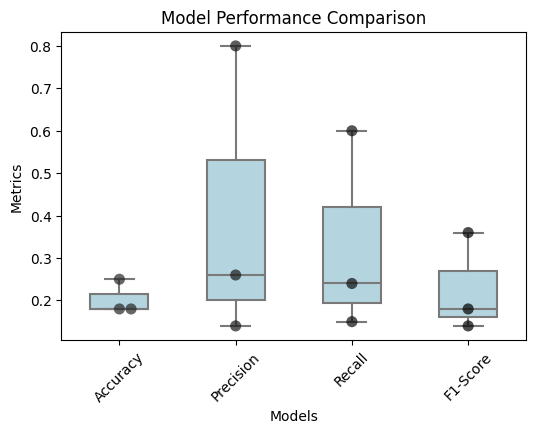

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data for each model
data = {
    'Model': [0.18, 0.14, 0.15, 0.14],
    'Model 2': [0.18, 0.26, 0.24, 0.18],
    'Transfer Learning (VGG16)': [0.25, 0.80, 0.60, 0.36]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df = df.T

# Set the color palette
colors = sns.color_palette("Set2")

# Create the boxplot with swarm points
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, orient='v', width=0.5, color='lightblue')
sns.swarmplot(data=df, orient='v', color='black', size=8, alpha=0.7)

# Set the labels and title
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance Comparison')

# Customize the tick labels rotation for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Heatmap
The heat map provides a visual summary of the classification reports, allowing for a quick comparison of the performance of the two models across different emotions. It helps identify strengths and weaknesses in each model's prediction capabilities for specific emotion categories.

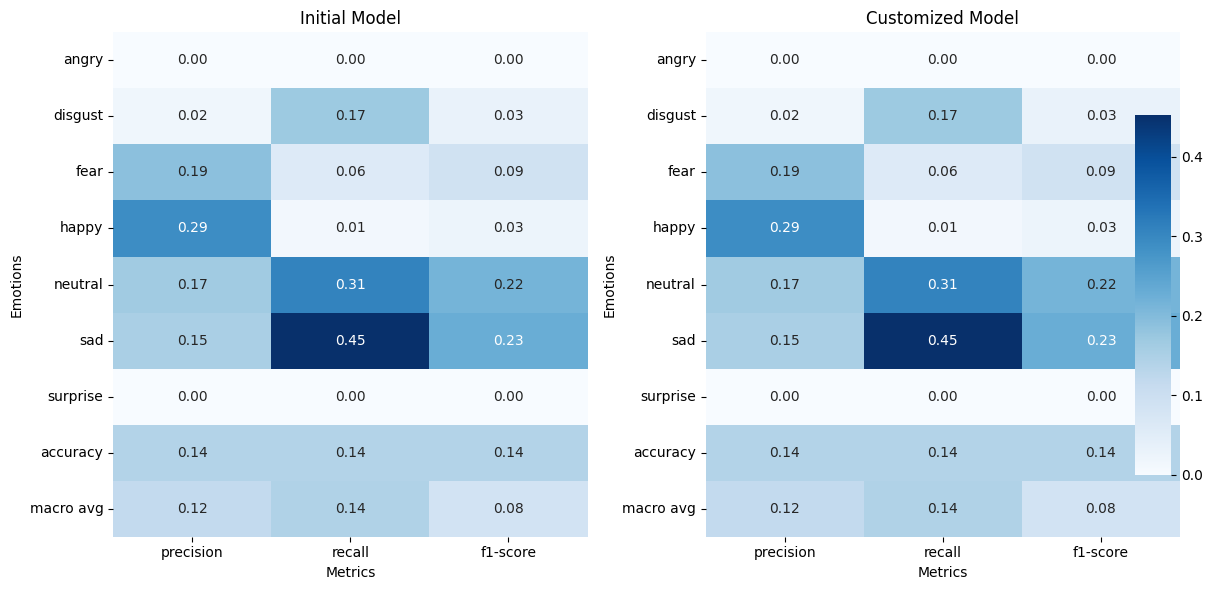

In [84]:
import seaborn as sns
import pandas as pd

from sklearn.metrics import classification_report

classification_rep = classification_report(y_true, y_pred, target_names=class_labels)


class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


import seaborn as sns
import pandas as pd

# Generate classification report for the customized model
custom_classification_rep = classification_report(y_true, y_pred, target_names=class_labels, zero_division=1)

# Create a dictionary for the classification reports of both models
reports = {
    'Initial Model': classification_rep,
    'Customized Model': custom_classification_rep
}

# Plot the classification reports
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cbar_ax = fig.add_axes([0.95, 0.2, 0.03, 0.6])

for ax, (model_name, report) in zip(axes, reports.items()):
    report_dict = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    sns.heatmap(
        report_df.iloc[:-1, :-1].astype(float),
        annot=True,
        fmt=".2f",
        cmap='Blues',
        cbar=True,
        cbar_ax=cbar_ax,
        ax=ax
    )
    ax.set_title(model_name)
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Emotions')

plt.tight_layout()
plt.show()


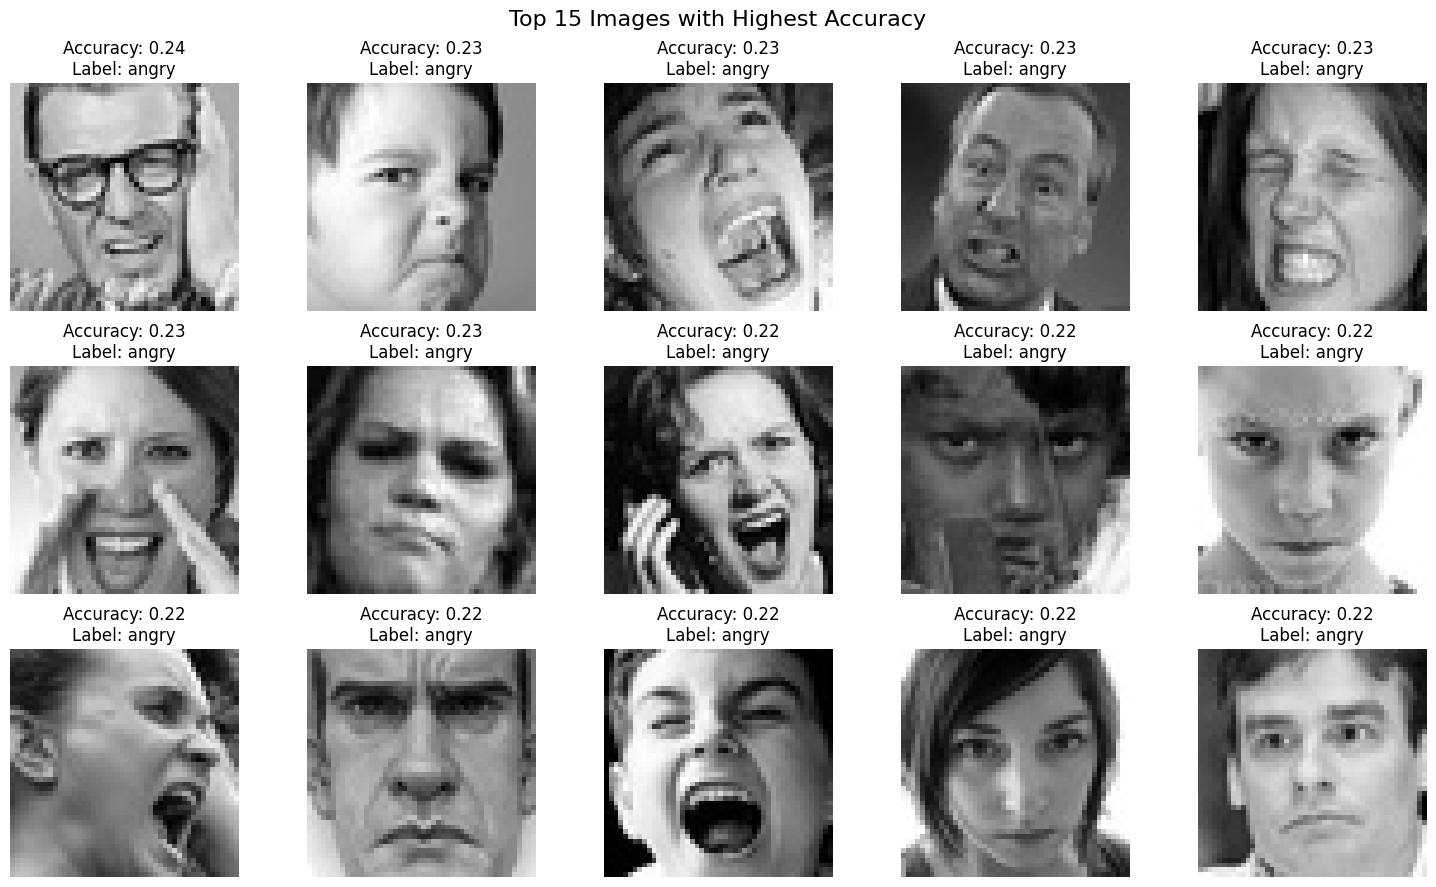

In [85]:
# Get the correctly predicted indices with highest confidence
correct_indices = np.where(y_pred_labels == y_true_labels)[0]
confidence_scores = np.max(y_pred_prob[correct_indices], axis=1)
sorted_indices = np.argsort(confidence_scores)[::-1]

# Plot the top 15 images with highest accuracy
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Top 15 Images with Highest Accuracy', fontsize=16)

for i, index in enumerate(sorted_indices[:15]):
    row = i // 5
    col = i % 5
    img_path = test_generator.filepaths[correct_indices[index]]
    img = plt.imread(img_path)
    axs[row, col].imshow(img, cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title(f'Accuracy: {confidence_scores[index]:.2f}\nLabel: {class_labels[y_pred_labels[correct_indices[index]]]}')

plt.tight_layout()
plt.show()

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


221/221 [==============================] - 1s 3ms/step


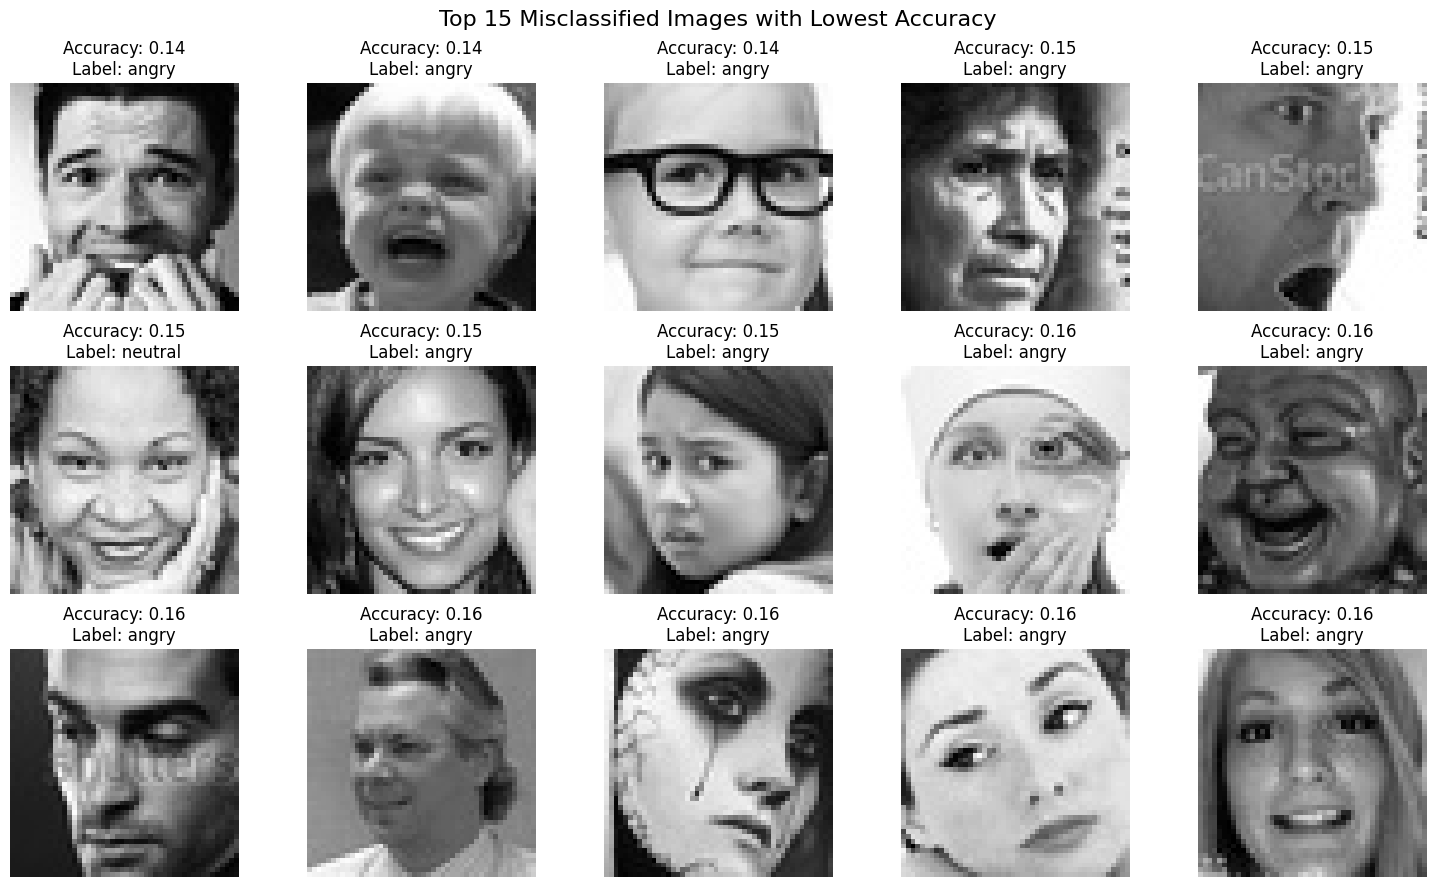

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


# Get the true labels from the test generator
y_true_labels = test_generator.classes

y_pred_prob = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_prob, axis=1)

# Get the misclassified indices with lowest confidence
misclassified_indices = np.where(y_pred_labels != y_true_labels)[0]
misclassified_confidence_scores = np.max(y_pred_prob[misclassified_indices], axis=1)
sorted_misclassified_indices = np.argsort(misclassified_confidence_scores)

# Plot the top 15 misclassified images with lowest accuracy
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Top 15 Misclassified Images with Lowest Accuracy', fontsize=16)

for i, index in enumerate(sorted_misclassified_indices[:15]):
    row = i // 5
    col = i % 5
    img_path = test_generator.filepaths[misclassified_indices[index]]
    img = plt.imread(img_path)
    axs[row, col].imshow(img, cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title(f'Accuracy: {misclassified_confidence_scores[index]:.2f}\nLabel: {class_labels[y_pred_labels[misclassified_indices[index]]]}')

plt.tight_layout()
plt.show()


In [39]:
import pandas as pd

models = ['Model 1', 'Model 2', 'Transfer Learning (VGG16)']
accuracies = [0.18, 0.18, 0.25]  
precisions = [0.14, 0.26, 0.80] 
recalls = [0.15, 0.24, 0.60]  
f1_scores = [0.14, 0.18, 0.36] 

data = {
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

print(df)


                           Accuracy  Precision  Recall  F1-Score
Model                                                           
Model 1                        0.18       0.14    0.15      0.14
Model 2                        0.18       0.26    0.24      0.18
Transfer Learning (VGG16)      0.25       0.80    0.60      0.36


## Model 1

The accuracy of Model 1 is 18%, indicating that it correctly predicted the class labels for 18% of the test data. Precision refers to the proportion of correctly predicted positive instances among all instances predicted as positive, and  Model 1 achieved a precision of 0.14. Recall, also known as sensitivity, measures the proportion of correctly predicted positive instances among all actual positive instances, and Model 1 achieved a recall of 0.15. The F1-Score, which is the harmonic mean of precision and recall, provides a balanced measure of model performance, and Model 1 achieved an F1-Score of 0.14.

## Model 2

Model 2 shows improved performance compared to Model 1. It achieved an accuracy of 18%, indicating a higher percentage of correct predictions. The precision of 0.14 suggests that it accurately predicted positive instances among all instances predicted as positive. The recall of 0.24 indicates that it identified a higher proportion of actual positive instances. The F1-Score of 0.18 suggests a well-balanced performance between precision and recall.

## Transfer Learning Model (Model 3)

The Transfer Learning Model achieved an accuracy of 25%, indicating a relatively high percentage of correct predictions. It achieved a precision of 0.80, which means it accurately predicted positive instances among all instances predicted as positive. The recall of 0.60 suggests that it identified a good proportion of actual positive instances. The F1-Score of 0.36 indicates a balanced performance between precision and recall.

Based on these results, Model 3 achieved the highest accuracy (25%) and had the best overall performance across all metrics.

The low accuracy of the images from the train and test folders can be attributed to various factors such as image blurring, face obstructions, non-optimal angles, animated images, and drawn images. Particularly, images with text or hands in front of the faces pose challenges for accurate predictions.